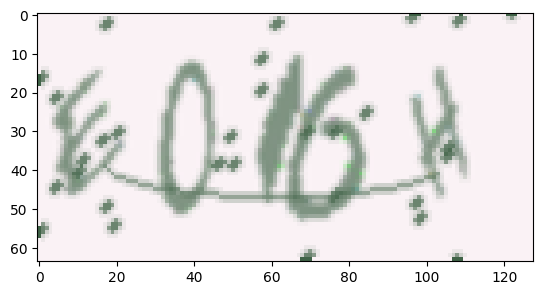

In [404]:
import os
import numpy as np 
from matplotlib import pyplot as plt
import cv2

filepath='test1/E0-6H.png'
im=cv2.imread(filepath)

plt.imshow(im[:,:,[2,1,0]])
plt.show()


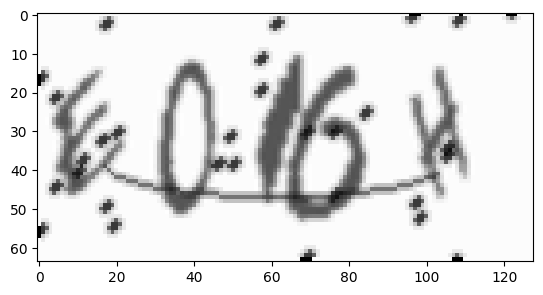

In [405]:
# convert the image from BGR into gray
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.imshow(im_gray,cmap="gray")
plt.show()


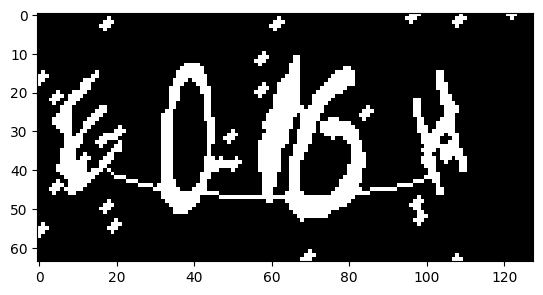

In [417]:
# image binarization, 230-255 (below 230 white, more is black we do the inversing in the same step binary_inv)
ret, im_inv = cv2.threshold(im_gray,235,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_inv, cmap='gray')
plt.show()

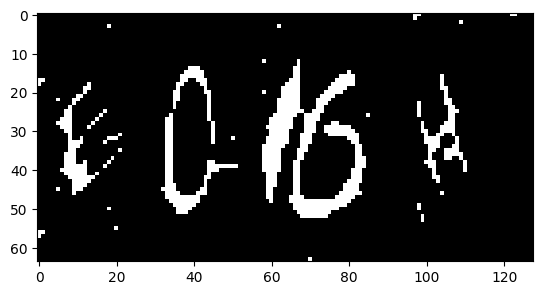

In [438]:
kernel = np.ones((2,2), np.uint8)
im_eroded = cv2.erode(im_inv, kernel, iterations=1)
plt.imshow(im_eroded, cmap='gray')
plt.show()

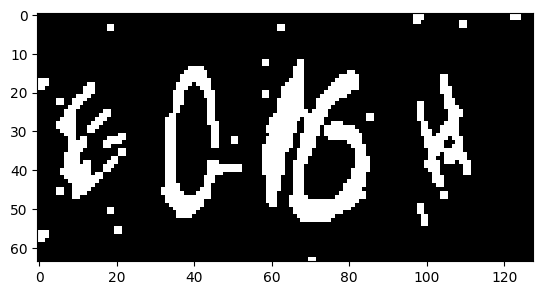

In [441]:
kernel_dilate = np.ones((2,2), np.uint8)
im_dilated = cv2.dilate(im_eroded, kernel_dilate, iterations=1)
plt.imshow(im_dilated, cmap='gray')

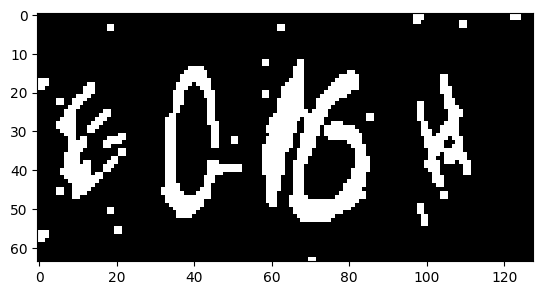

In [426]:
# remove circles 
circles = cv2.HoughCircles(
    im_eroded, 
    cv2.HOUGH_GRADIENT, dp=1, minDist=0.01, param1=200, param2=7, minRadius=0, maxRadius=3
)

if circles is not None:
    # Convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # Create a mask to remove additional circle noise
    mask = np.zeros(im_eroded.shape, dtype=np.uint8)
    for (x, y, r) in circles:
        cv2.circle(mask, (x, y), r,255, -1)

    mask = cv2.bitwise_not(mask)
    im_notcircle = cv2.bitwise_and(im_eroded, im_eroded, mask=mask)
else:
    im_notcircle = im_eroded
    
plt.imshow(im_notcircle, cmap='gray')

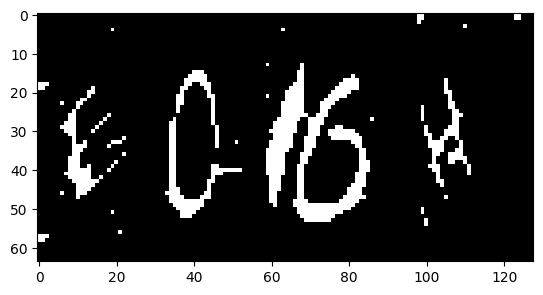

In [430]:
kernel = np.ones((2,2), np.uint8)
im_erosion = cv2.erode(im_notcircle, kernel, iterations=1)
plt.imshow(im_erosion, cmap='gray')

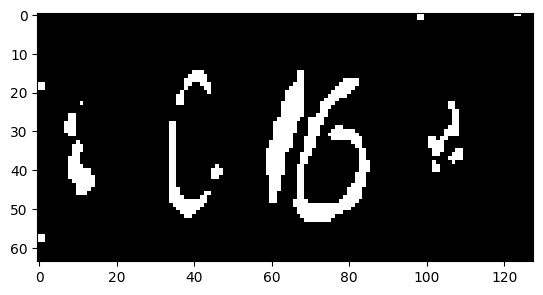

In [431]:
im_median4 = cv2.medianBlur(im_erosion,3)
plt.imshow(im_median4, cmap='gray')

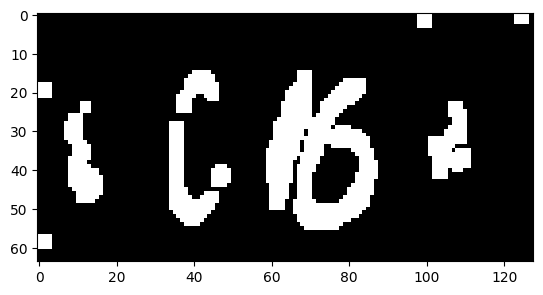

In [432]:
kernel_dilate = np.ones((2,2), np.uint8)
im_dilation = cv2.dilate(im_median4, kernel_dilate, iterations=2)
plt.imshow(im_dilation, cmap='gray')

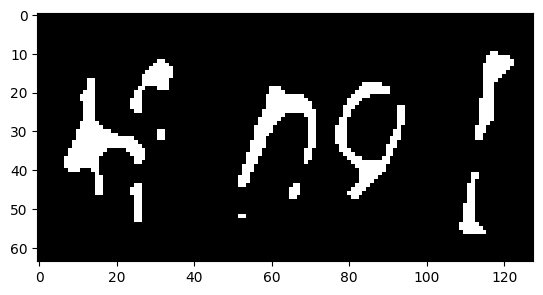

In [403]:
kernel = np.ones((3,3), np.uint8)
im_erosion = cv2.erode(im_dilation, kernel, iterations=1)
plt.imshow(im_erosion, cmap='gray')